To crop the images and resize them to 512x512

In [1]:
# Laoding the required libraries
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

In [2]:
desired_size = (512, 512)

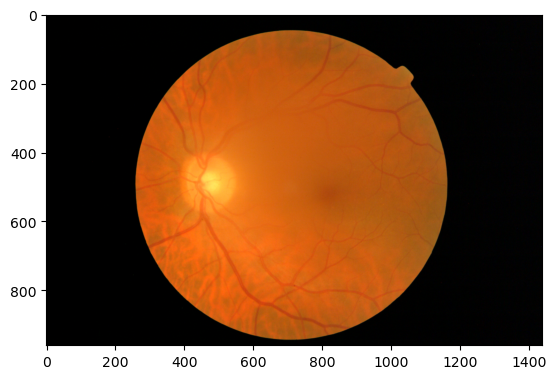

In [3]:
# Loading a sample image
img = Image.open("/Users/revanth/Downloads/Messidor/resize_samples/source_2.tif")
plt.imshow(img)
plt.show()

In [11]:
# Converting the image to numpy array
img_np = np.array(img)
print(img_np.shape)

(960, 1440, 3)


In [12]:
x_dim = img_np.shape[0]
y_dim = img_np.shape[1]
z_dim = img_np.shape[2]

x_arr = np.zeros(x_dim)
y_arr = np.zeros(y_dim)

In [13]:
# Sum along the color axis (assuming the color axis is the third dimension)
pixel_sums = img_np.sum(axis=2)

# Sum along the x and y axes
x_arr = pixel_sums.sum(axis=1)
y_arr = pixel_sums.sum(axis=0)

In [14]:
# Define a threshold
threshold = 15

# Find the first and last indices where the sum exceeds the threshold
x_start = np.where(x_arr > threshold * y_dim)[0][0]
x_end = np.where(x_arr > threshold * y_dim)[0][-1]

y_start = np.where(y_arr > threshold * x_dim)[0][0]
y_end = np.where(y_arr > threshold * x_dim)[0][-1]

In [8]:
print("x_arr shape: ", x_arr.shape)
print("y_arr shape: ", y_arr.shape)

x_arr shape:  (960,)
y_arr shape:  (1440,)


In [ ]:
# extracting pizel values by traversing through the image
for i in range(x_dim):
    for j in range(y_dim):
        pixel_sum = img_np[i][j].sum()
        x_arr[i] += pixel_sum
        y_arr[j] += pixel_sum

In [7]:
# removing noise
x_arr = x_arr - (y_dim * 15)
y_arr = y_arr - (x_dim * 15)

In [8]:
# converting to binary, 0 and >0
x_arr = (x_arr > 0).astype(int)
y_arr = (y_arr > 0).astype(int)

In [10]:
# first and last non-zero indexes in x_arr
x_start = np.min(np.nonzero(x_arr))
x_end = np.max(np.nonzero(x_arr))

# first and last non-zero indexes in y_arr
y_start = np.min(np.nonzero(y_arr))
y_end = np.max(np.nonzero(y_arr))

# printing the values
print(f"The range of x is from {x_start} to {x_end}")
print(f"The range of y is from {y_start} to {y_end}")

The range of x is from 0 to 959
The range of y is from 0 to 1439


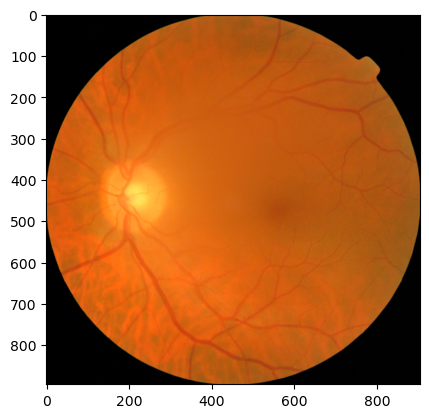

In [15]:
new_img = img_np[x_start:x_end, y_start:y_end]
plt.imshow(new_img)

In [ ]:
# converting back to image
new_img = Image.fromarray(new_img)

# resizing the image
new_img = new_img.resize(desired_size)

plt.imshow(new_img)
plt.show()